<center><a href="https://www.nvidia.com/dli"> <img src="https://github.com/stanley160990/AI-101/blob/main/04-Library_DS/Pelatihan-DLI.jpeg?raw=1" alt="Header" style="width: 1000px;"/> </a></center>

# Pengenalan Library Python untuk Data Science dan AI
## TensorFlow (Deep Learning Framework)
### Pelatihan Dasar Deep Learning untuk TNI

Notebook ini memperkenalkan **TensorFlow**, library utama untuk *Deep Learning*, kecerdasan buatan tingkat lanjut yang digunakan di berbagai bidang, termasuk **pertahanan dan militer modern**.

---
## 🎯 Tujuan Pembelajaran
- Memahami konsep dasar Deep Learning.
- Mengenal struktur model Neural Network.
- Menggunakan TensorFlow untuk membuat model prediksi sederhana.

## 🟩 1️⃣ Pengenalan TensorFlow

### Apa itu TensorFlow?
- **TensorFlow** adalah library open-source buatan **Google** untuk *Machine Learning* dan *Deep Learning*.
- Dapat digunakan untuk membangun model AI seperti:
  - Deteksi objek (UAV, kendaraan)
  - Pengenalan wajah atau pola seragam
  - Prediksi data logistik

**TensorFlow** terdiri dari dua komponen utama:
- `Tensor` → representasi data multidimensi (angka, citra, sinyal)
- `Flow` → aliran data melalui lapisan-lapisan jaringan saraf.

In [1]:
# Import TensorFlow
import tensorflow as tf

print("TensorFlow siap digunakan untuk pelatihan TNI!")
print("Versi TensorFlow:", tf.__version__)

TensorFlow siap digunakan untuk pelatihan TNI!
Versi TensorFlow: 2.19.0


## 🟩 2️⃣ Struktur Dasar Deep Learning Model

Sebuah model Deep Learning umumnya memiliki 3 komponen utama:

```
Input Data → Hidden Layer(s) → Output Layer
```
- Input = Data dari sensor/pengamatan lapangan
- Hidden Layer = Proses analisis intelijen (pemrosesan informasi)
- Output = Keputusan atau prediksi operasi

## 🟩 3️⃣ Model Prediksi Linear Sederhana

Contoh pertama: model sederhana untuk mempelajari hubungan **linear** antara jumlah logistik dan prajurit.

Fungsi yang dipelajari model: `y = 2x`

In [6]:
import numpy as np
import tensorflow as tf

# Data simulasi
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # hubungan linear y = 2x

# Model Sequential dengan 1 neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Kompilasi model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Latih model
history = model.fit(x, y, epochs=200, verbose=0)

# Prediksi — pakai array 2D
pred = model.predict(np.array([[6]]))
print("Prediksi logistik untuk x=6:", round(pred[0][0], 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediksi logistik untuk x=6: 11.69


### Visualisasi Proses Pelatihan

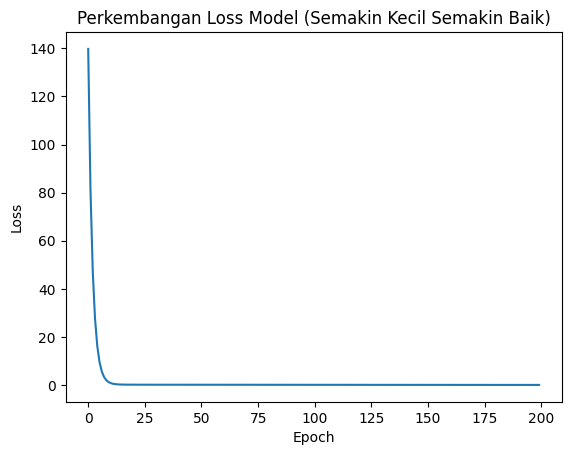

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Perkembangan Loss Model (Semakin Kecil Semakin Baik)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 🟩 4️⃣ Model Klasifikasi Kesiapan Logistik

Gunakan **sigmoid activation** untuk membedakan antara dua kondisi:
- 1 → *Siap*
- 0 → *Tidak Siap*

In [8]:
# Data simulasi logistik
data = np.array([[80], [60], [40], [20], [10]])  # stok logistik
label = np.array([[1], [1], [0], [0], [0]])      # 1=Siap, 0=Tidak Siap

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=[1])
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(data, label, epochs=200, verbose=0)

pred = model2.predict(np.array([[50]]))
print("Prediksi kesiapan logistik (stok=50):", round(pred[0][0], 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediksi kesiapan logistik (stok=50): 0.67


### Visualisasi Probabilitas Kesiapan

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


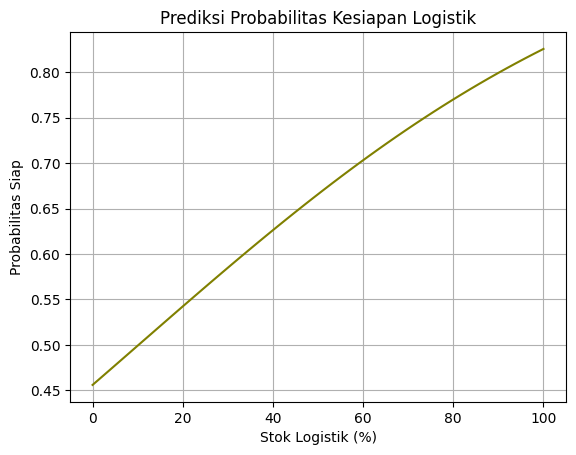

In [9]:
x_values = np.linspace(0, 100, 50).reshape(-1, 1)
predictions = model2.predict(x_values)

plt.plot(x_values, predictions, color='olive')
plt.title('Prediksi Probabilitas Kesiapan Logistik')
plt.xlabel('Stok Logistik (%)')
plt.ylabel('Probabilitas Siap')
plt.grid(True)
plt.show()

## 🟩 5️⃣ Artificial Neural Network (ANN)

Model multilayer (berlapis) memungkinkan jaringan mempelajari hubungan kompleks.

**Struktur:**
- Input layer: menerima data (contoh: jumlah prajurit & ancaman)
- Hidden layer: kombinasi non-linear (ReLU)
- Output layer: hasil (0/1 atau nilai prediksi)

In [10]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[2]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

## 🟩 6️⃣ Studi Kasus: Prediksi Risiko Misi Operasi

**Tujuan:** Prediksi apakah misi berisiko tinggi atau rendah berdasarkan tingkat ancaman dan ketersediaan logistik.

In [11]:
X = np.array([[0.2, 0.8], [0.4, 0.6], [0.7, 0.3], [0.9, 0.2]])
Y = np.array([[0], [0], [1], [1]])  # 1=Risiko Tinggi

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=[2]),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X, Y, epochs=300, verbose=0)

pred = model4.predict(np.array([[0.6, 0.4]]))
print("Prediksi risiko misi:", 'Tinggi' if pred[0][0]>0.5 else 'Rendah')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediksi risiko misi: Rendah


## 🟩 7️⃣ Exercise — Prediksi Kesiapan Operasi TNI

**Tugas:**
1. Buat data simulasi berisi 3 fitur: `jumlah_prajurit`, `logistik`, `ancaman`.
2. Label: 1 = Siap, 0 = Tidak Siap.
3. Buat model *Sequential* dengan 2 layer tersembunyi.
4. Latih model dan tampilkan akurasi.
5. Visualisasikan hasil pelatihan (*loss dan accuracy*).

In [23]:
# 🧩 TODO: Lengkapi latihan ini untuk membangun model kesiapan operasi TNI
# Gunakan TensorFlow Sequential dengan Dense layers
# Gunakan fitur [prajurit, logistik, ancaman] dan label kesiapan
#
X = np.array([[253, 0.8, 0.2], [186, 0.6, 0.4], [120, 0.3, 0.7], [100, 0.2, 0.9]])
Y = np.array([[0], [0], [1], [1]])  # 1=Risiko Tinggi

model_siap = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=[3]),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_siap.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cek=model_siap.fit(X, Y, epochs=300, verbose=0)

pred = model_siap.predict(np.array([[200, 0.6, 0.65]]))
print("Prediksi risiko misi:", 'Tinggi' if pred[0][0]>0.5 else 'Rendah')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediksi risiko misi: Rendah


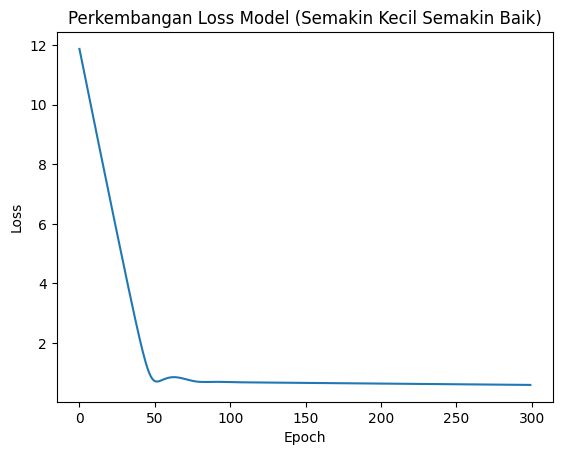

In [24]:
import matplotlib.pyplot as plt

plt.plot(cek.history['loss'])
plt.title('Perkembangan Loss Model (Semakin Kecil Semakin Baik)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()